<a href="https://colab.research.google.com/github/Khushbooratnani/AIML-LAB/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/annual-enterprise-survey-2023-financial-year-provisional.csv', na_values=['', ' ', 'NA', 'null', 'NAN'])

In [3]:
print(df.isnull().sum())

Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units                          0
Variable_code                  0
Variable_name                  0
Variable_category              0
Value                          0
Industry_code_ANZSIC06         0
dtype: int64


In [4]:

# Using mean imputation for missing numerical data and mode for categorical data
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute missing values for categorical columns
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [5]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Year                           0
Industry_aggregation_NZSIOC    0
Industry_code_NZSIOC           0
Industry_name_NZSIOC           0
Units                          0
Variable_code                  0
Variable_name                  0
Variable_category              0
Value                          0
Industry_code_ANZSIC06         0
dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


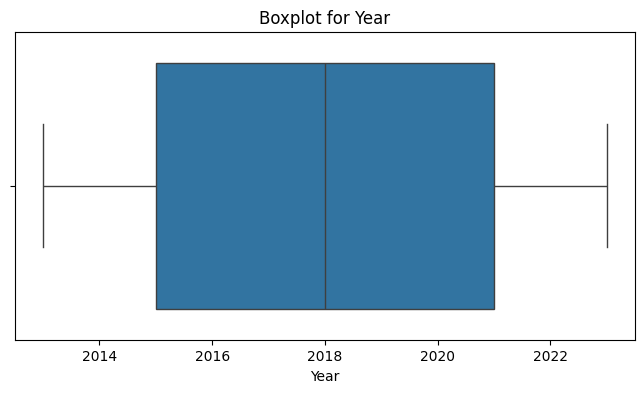

In [6]:
# Detecting outliers using IQR (Interquartile Range) method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Visualizing the distribution of numerical columns to detect outliers
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()



In [7]:
# Removing outliers from numerical columns
for col in num_cols:
    df = remove_outliers(df, col)
